# Tests

In [14]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [15]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [16]:
R.<t, x,y> = RIF[]

In [19]:
system = System(
    R,
    (t, x,y),
    [0, (4,5), (1,2)],
    [
        1,
        -y,
        x,
    ],
)

In [26]:
sig = (Atomic(var("t") > 3) & Atomic(var("t") < 4)).signal_for_system(
    system, 5,
)

phi variables sfs = {t}
system sfs = System(R, (t, x, y), [0, [4 .. 5], [1 .. 2]], (1, -y, x), varmap=bidict({'t': t, 'x': x, 'y': y}))
Computed 51 flowpipes in 0.060668200138024986 sec
PolyObserver(t - 3, <flowstar.reachability.Reach object at 0x7fc3eca3bd00>, 1, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 1
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[2.9999999999999125 .. 3.0000000000000884]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[2.9999999999999125 .. 3.0000000000000884]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[2.9999999999999125 .. 3.0000000000000884]]
signal given bool roots: 1 items in 0.00 seconds
PolyObserver(-t + 4, <flowstar.reachability.Reach object at 0x7fc3eca3bd00>, -1, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1
root

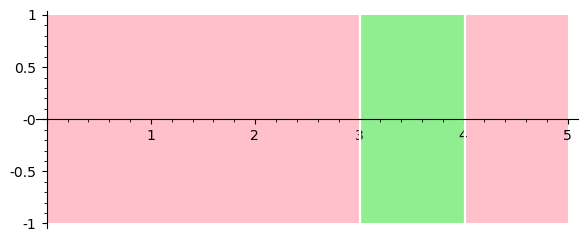

In [27]:
sig.plot()

In [33]:
st = Signal(RIF(0, 5),
    [(RIF(3, 4), True)]
)
sf = Signal(RIF(0, 5),
    [(RIF(3, 4), False)]
)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


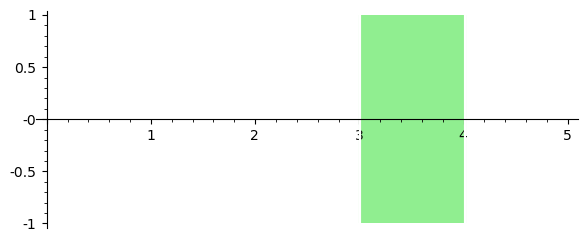

In [36]:
st.plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


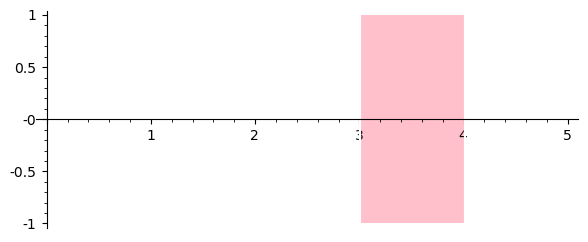

In [37]:
sf.plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


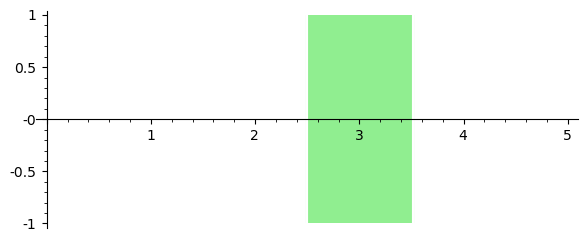

In [40]:
st.F(RIF(0.5)).to_domain(RIF(0,5)).plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


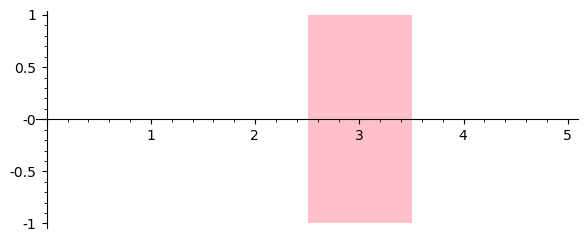

In [41]:
sf.F(RIF(0.5)).to_domain(RIF(0,5)).plot()

In [ ]:
st.F(RIF(0.5)).to_domain(RIF(0,5)).plot()

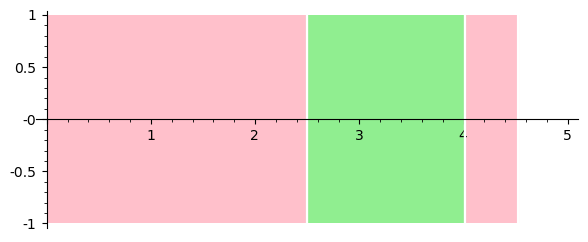

In [44]:
sig.F(RIF(0,0.5)).plot()

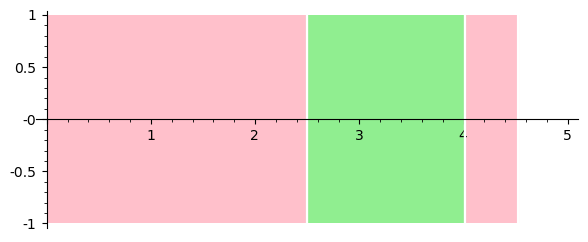

In [49]:
(~(~sig).G(RIF(0,0.5))).plot()

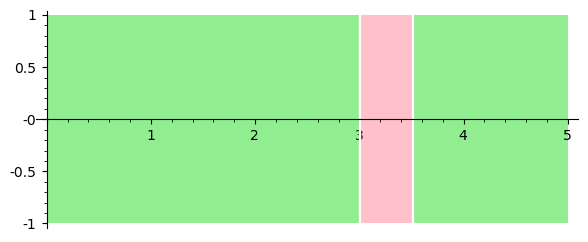

In [51]:
((~sig).F(RIF(0,0.5))).plot()

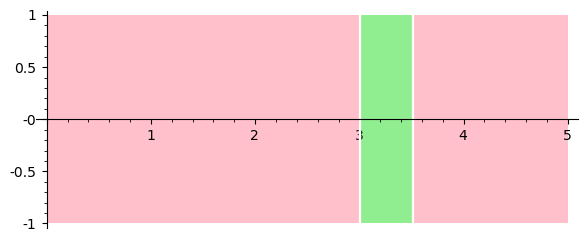

In [45]:
sig.G(RIF(0,0.5)).plot()

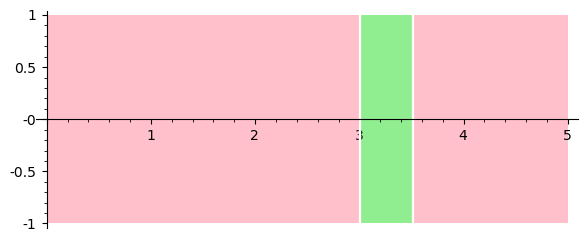

In [47]:
(~(~sig).F(RIF(0,0.5))).plot()